https://www.machinelearningmindset.com/tfrecords-for-tensorflow/

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

### 이미지 다운로드하고 전처리

In [29]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 데이터 픽셀 값을 0~1사이 값으로 스케일링
x_train = x_train / 255.0   
x_test = x_test / 255.0

# data type 확인하여 변수에 저장
dataType = x_train.dtype
print(f"Data type: {dataType}")
labelType = y_test.dtype
print(f"Data type: {labelType}")

Data type: float64
Data type: uint8


### 시각화

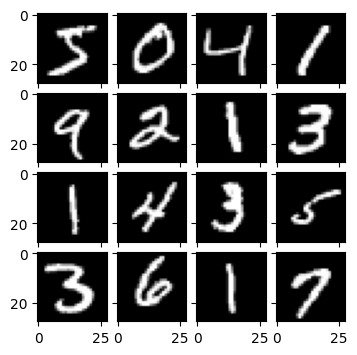

In [30]:
im_list = []
n_samples_to_show = 16 # 보여줄 샘플 수 
c = 0
for i in range(n_samples_to_show):
      im_list.append(x_train[i])

# 시각화
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(4., 4.))

grid = ImageGrid(fig, 111,  # subplot(111)
                 nrows_ncols=(4, 4),  #  2x2 그리드 생성
                 axes_pad=0.1,  # 축 사이의 간격 설정(인치)
                 )

# Show image grid
for ax, im in zip(grid, im_list):
    # 그리드를 순회하면서 각각의 Axes를 반환
    ax.imshow(im, 'gray')
plt.show()

### TFRecord 파일 작성 함수
* image_example 함수를 정의하여 이미지, 레이블, 차원을 tf.train.Example로 변환
* 세가지 함수는 각각 다른 데이터 타입에 대한 tf.train.Feature를 반환하는 함수들. 이 중 하나의 함수를 선택하여 데이터의 타입에 따라 해당 함수를 사용하여 tf.train.Feature를 생성하면 된다.</br>
</br>
* 이미지 데이터의 경우 _bytes_feature 함수를 사용하여 이미지 데이터를 tf.train.Feature(bytes_list=...) 형태로 변환
* 숫자 데이터의 경우 _int64_feature 함수를 사용하여 정수형 데이터를 tf.train.Feature(int64_list=...) 형태로 변환* 실수형 데이터의 경우 _float_feature 함수를 사용하여 실수형 데이터를 tf.train.Feature(float_list=...) 형태로 변환

In [31]:
# 값을 호환되는 tf.Example 유형으로 변환
def _bytes_feature(value):
    """문자열/바이트에서 bytes_list를 반환"""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy()  # BytesList won't unpack a string from an EagerTensor.
    if isinstance(value, str):
        value = value.encode('utf-8')  # UTF-8 인코딩 적용
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))


#def _float_feature(value):
#    """float/double에서 float_list를 반환"""
#    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

#def _int64_feature(value):
#    """bool / enum / int / uint에서 int64_list를 반환"""
#    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


In [32]:
# Create the features dictionary.
def image_example(image, label, dimension):
    feature = {
        'dimension': _int64_feature(dimension),
        'label': _int64_feature(label),
        'image_raw': _bytes_feature(image.tobytes()),
    }
    return tf.train.Example(features=tf.train.Features(feature=feature))

### TFRecord 파일 작성
TFRecordWriter를 사용하여 TFRecord 파일을 작성. 각 이미지와 레이블에 대해 image_example 함수를 사용하여 tf_example을 생성하고, SerializeToString()을 사용하여 이를 직렬화한 후 TFRecord 파일에 작성

In [28]:
record_file = 'mnistTrain.tfrecords'
n_samples = x_train.shape[0]
dimension = x_train.shape[1]
with tf.io.TFRecordWriter(record_file) as writer:
    for i in range(n_samples):
        image = x_train[i]
        label = y_train[i]
        tf_example = image_example(image, label, dimension)
        writer.write(tf_example.SerializeToString())


### TFRecord가 정상적으로 저장되었는지 확인
- TFRecord 파일은 이진 형식으로 저장되기 때문에 직접 텍스트 에디터로 열어서 내용을 확인하기는 어렵다. 하지만 저장된 TFRecord 파일을 다시 읽어와서 데이터를 확인할 수 있다.

In [33]:
record_file = 'mnistTrain.tfrecords'

# TFRecord 파일 열기
record_iterator = tf.compat.v1.io.tf_record_iterator(path=record_file)

# TFRecord 파일 내의 데이터 확인
for string_record in record_iterator:
    example = tf.train.Example()
    example.ParseFromString(string_record)

    # TFRecord 내의 데이터 추출
    image_raw = example.features.feature['image_raw'].bytes_list.value[0]
    label = example.features.feature['label'].int64_list.value[0]

    # 데이터 확인
    print(f"Label: {label}")
    # 이미지 데이터는 디코딩 등의 처리를 거쳐야 할 수 있습니다.


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Label: 5
Label: 0
Label: 4
Label: 1
Label: 9
Label: 2
Label: 1
Label: 3
Label: 1
Label: 4
Label: 3
Label: 5
Label: 3
Label: 6
Label: 1
Label: 7
Label: 2
Label: 8
Label: 6
Label: 9
Label: 4
Label: 0
Label: 9
Label: 1
Label: 1
Label: 2
Label: 4
Label: 3
Label: 2
Label: 7
Label: 3
Label: 8
Label: 6
Label: 9
Label: 0
Label: 5
Label: 6
Label: 0
Label: 7
Label: 6
Label: 1
Label: 8
Label: 7
Label: 9
Label: 3
Label: 9
Label: 8
Label: 5
Label: 9
Label: 3
Label: 3
Label: 0
Label: 7
Label: 4
Label: 9
Label: 8
Label: 0
Label: 9
Label: 4
Label: 1
Label: 4
Label: 4
Label: 6
Label: 0
Label: 4
Label: 5
Label: 6
Label: 1
Label: 0
Label: 0
Label: 1
Label: 7
Label: 1
Label: 6
Label: 3
Label: 0
Label: 2
Label: 1
Label: 1
Label: 7
Label: 9
Label: 0
Label: 2
Label: 6
Label: 7
Label: 8
Label: 3
Label: 9
Label: 0
Label: 4
Label: 6
Label: 7
Label: 4
Label: 6
Label: 8
Label: 0
Label: 7
Label: 8
Label: 3
Label: 1
Label: 5
Label:

Label: 1
Label: 6
Label: 2
Label: 0
Label: 2
Label: 0
Label: 0
Label: 6
Label: 9
Label: 9
Label: 8
Label: 0
Label: 2
Label: 1
Label: 3
Label: 1
Label: 4
Label: 3
Label: 0
Label: 2
Label: 4
Label: 1
Label: 8
Label: 0
Label: 4
Label: 0
Label: 0
Label: 1
Label: 7
Label: 2
Label: 7
Label: 3
Label: 7
Label: 4
Label: 0
Label: 5
Label: 8
Label: 6
Label: 9
Label: 7
Label: 3
Label: 8
Label: 7
Label: 9
Label: 9
Label: 0
Label: 1
Label: 1
Label: 5
Label: 2
Label: 0
Label: 3
Label: 8
Label: 4
Label: 7
Label: 5
Label: 2
Label: 6
Label: 4
Label: 7
Label: 1
Label: 8
Label: 0
Label: 9
Label: 2
Label: 0
Label: 0
Label: 1
Label: 9
Label: 2
Label: 5
Label: 3
Label: 6
Label: 4
Label: 3
Label: 5
Label: 6
Label: 6
Label: 9
Label: 7
Label: 1
Label: 8
Label: 3
Label: 9
Label: 6
Label: 0
Label: 7
Label: 9
Label: 1
Label: 5
Label: 7
Label: 5
Label: 3
Label: 6
Label: 8
Label: 9
Label: 5
Label: 8
Label: 1
Label: 9
Label: 4
Label: 8
Label: 5
Label: 7
Label: 8
Label: 5
Label: 8
Label: 1
Label: 1
Label: 0
Label: 9
L

Label: 1
Label: 8
Label: 2
Label: 2
Label: 3
Label: 3
Label: 4
Label: 1
Label: 5
Label: 3
Label: 6
Label: 6
Label: 7
Label: 8
Label: 8
Label: 2
Label: 9
Label: 5
Label: 0
Label: 2
Label: 1
Label: 5
Label: 2
Label: 7
Label: 3
Label: 9
Label: 4
Label: 6
Label: 5
Label: 1
Label: 6
Label: 1
Label: 7
Label: 0
Label: 8
Label: 3
Label: 9
Label: 8
Label: 0
Label: 1
Label: 1
Label: 3
Label: 2
Label: 2
Label: 3
Label: 1
Label: 4
Label: 5
Label: 7
Label: 7
Label: 8
Label: 3
Label: 9
Label: 3
Label: 2
Label: 7
Label: 2
Label: 7
Label: 7
Label: 9
Label: 6
Label: 5
Label: 4
Label: 7
Label: 7
Label: 3
Label: 3
Label: 9
Label: 5
Label: 1
Label: 4
Label: 0
Label: 1
Label: 7
Label: 8
Label: 0
Label: 0
Label: 6
Label: 5
Label: 3
Label: 2
Label: 9
Label: 7
Label: 7
Label: 2
Label: 4
Label: 3
Label: 6
Label: 6
Label: 2
Label: 2
Label: 1
Label: 1
Label: 4
Label: 7
Label: 8
Label: 7
Label: 0
Label: 9
Label: 9
Label: 9
Label: 3
Label: 1
Label: 2
Label: 2
Label: 4
Label: 4
Label: 0
Label: 6
Label: 1
Label: 7
L

Label: 1
Label: 9
Label: 6
Label: 7
Label: 1
Label: 0
Label: 2
Label: 0
Label: 6
Label: 4
Label: 0
Label: 9
Label: 9
Label: 1
Label: 5
Label: 6
Label: 1
Label: 2
Label: 2
Label: 7
Label: 8
Label: 6
Label: 5
Label: 8
Label: 8
Label: 3
Label: 3
Label: 5
Label: 9
Label: 2
Label: 8
Label: 1
Label: 1
Label: 8
Label: 8
Label: 6
Label: 9
Label: 1
Label: 5
Label: 0
Label: 0
Label: 3
Label: 5
Label: 1
Label: 7
Label: 4
Label: 8
Label: 0
Label: 2
Label: 1
Label: 9
Label: 2
Label: 2
Label: 3
Label: 5
Label: 4
Label: 3
Label: 5
Label: 5
Label: 6
Label: 1
Label: 7
Label: 3
Label: 8
Label: 6
Label: 9
Label: 5
Label: 0
Label: 6
Label: 1
Label: 2
Label: 2
Label: 8
Label: 3
Label: 3
Label: 4
Label: 1
Label: 5
Label: 9
Label: 6
Label: 4
Label: 7
Label: 6
Label: 8
Label: 0
Label: 0
Label: 2
Label: 1
Label: 3
Label: 2
Label: 0
Label: 3
Label: 5
Label: 1
Label: 0
Label: 5
Label: 0
Label: 6
Label: 9
Label: 7
Label: 3
Label: 8
Label: 1
Label: 7
Label: 9
Label: 0
Label: 9
Label: 6
Label: 4
Label: 0
Label: 0
L

Label: 9
Label: 9
Label: 1
Label: 0
Label: 2
Label: 2
Label: 4
Label: 4
Label: 6
Label: 8
Label: 7
Label: 1
Label: 7
Label: 7
Label: 5
Label: 9
Label: 4
Label: 6
Label: 5
Label: 2
Label: 0
Label: 7
Label: 1
Label: 6
Label: 1
Label: 9
Label: 9
Label: 6
Label: 2
Label: 7
Label: 0
Label: 2
Label: 3
Label: 5
Label: 1
Label: 2
Label: 4
Label: 0
Label: 0
Label: 8
Label: 6
Label: 9
Label: 4
Label: 9
Label: 3
Label: 6
Label: 9
Label: 4
Label: 3
Label: 0
Label: 0
Label: 1
Label: 0
Label: 3
Label: 5
Label: 5
Label: 2
Label: 0
Label: 8
Label: 9
Label: 8
Label: 3
Label: 8
Label: 2
Label: 8
Label: 2
Label: 5
Label: 4
Label: 5
Label: 8
Label: 7
Label: 7
Label: 1
Label: 2
Label: 4
Label: 2
Label: 1
Label: 9
Label: 3
Label: 6
Label: 8
Label: 3
Label: 9
Label: 7
Label: 3
Label: 5
Label: 7
Label: 8
Label: 4
Label: 2
Label: 1
Label: 7
Label: 1
Label: 7
Label: 0
Label: 0
Label: 6
Label: 0
Label: 0
Label: 6
Label: 1
Label: 0
Label: 2
Label: 2
Label: 3
Label: 0
Label: 4
Label: 8
Label: 5
Label: 6
Label: 6
L

Label: 2
Label: 1
Label: 9
Label: 4
Label: 0
Label: 8
Label: 5
Label: 8
Label: 8
Label: 4
Label: 6
Label: 5
Label: 2
Label: 7
Label: 8
Label: 5
Label: 2
Label: 7
Label: 4
Label: 8
Label: 1
Label: 3
Label: 8
Label: 4
Label: 5
Label: 8
Label: 0
Label: 8
Label: 4
Label: 5
Label: 5
Label: 2
Label: 8
Label: 9
Label: 0
Label: 7
Label: 4
Label: 1
Label: 8
Label: 3
Label: 4
Label: 8
Label: 9
Label: 1
Label: 4
Label: 0
Label: 4
Label: 7
Label: 1
Label: 5
Label: 1
Label: 9
Label: 2
Label: 6
Label: 0
Label: 9
Label: 0
Label: 4
Label: 5
Label: 7
Label: 1
Label: 7
Label: 3
Label: 9
Label: 2
Label: 9
Label: 3
Label: 5
Label: 6
Label: 8
Label: 1
Label: 3
Label: 7
Label: 4
Label: 7
Label: 4
Label: 5
Label: 3
Label: 4
Label: 2
Label: 0
Label: 0
Label: 0
Label: 1
Label: 7
Label: 2
Label: 6
Label: 3
Label: 2
Label: 4
Label: 3
Label: 5
Label: 1
Label: 6
Label: 1
Label: 7
Label: 0
Label: 8
Label: 1
Label: 0
Label: 9
Label: 1
Label: 8
Label: 2
Label: 1
Label: 3
Label: 0
Label: 4
Label: 9
Label: 7
Label: 1
L

Label: 8
Label: 9
Label: 5
Label: 0
Label: 5
Label: 1
Label: 8
Label: 2
Label: 9
Label: 3
Label: 5
Label: 4
Label: 1
Label: 5
Label: 0
Label: 6
Label: 6
Label: 7
Label: 5
Label: 8
Label: 9
Label: 9
Label: 6
Label: 0
Label: 2
Label: 8
Label: 3
Label: 3
Label: 1
Label: 9
Label: 1
Label: 5
Label: 2
Label: 5
Label: 1
Label: 2
Label: 9
Label: 6
Label: 8
Label: 8
Label: 3
Label: 4
Label: 7
Label: 9
Label: 7
Label: 1
Label: 2
Label: 7
Label: 7
Label: 1
Label: 0
Label: 2
Label: 9
Label: 3
Label: 7
Label: 5
Label: 9
Label: 9
Label: 0
Label: 6
Label: 0
Label: 9
Label: 3
Label: 1
Label: 5
Label: 1
Label: 8
Label: 1
Label: 3
Label: 2
Label: 3
Label: 9
Label: 1
Label: 5
Label: 3
Label: 6
Label: 6
Label: 8
Label: 8
Label: 1
Label: 8
Label: 2
Label: 5
Label: 0
Label: 1
Label: 7
Label: 8
Label: 7
Label: 0
Label: 5
Label: 4
Label: 8
Label: 5
Label: 2
Label: 8
Label: 9
Label: 7
Label: 8
Label: 3
Label: 7
Label: 2
Label: 1
Label: 1
Label: 3
Label: 2
Label: 4
Label: 7
Label: 5
Label: 6
Label: 6
Label: 8
L